In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/YoloV5

/content/drive/MyDrive/YoloV5


In [4]:
!ls

data  yolov5  YoloV5.ipynb


In [5]:
%cd /content/drive/MyDrive/YoloV5

/content/drive/MyDrive/YoloV5


In [6]:
import torch # YOLOv5 implemented using pytorch

In [7]:
from IPython.display import Image #this is to render predictions

In [8]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [9]:
%cd yolov5

/content/drive/MyDrive/YoloV5/yolov5


In [10]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.5/616.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00


In [11]:
!pip install IProgress

In [12]:
from tqdm import tqdm
import IProgress
from ipywidgets import IntProgress

In [13]:
torch.cuda.get_arch_list()

['sm_37', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'sm_80', 'sm_86', 'sm_90']

In [14]:
print('All set. Using PyTorch version %s with %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

All set. Using PyTorch version 2.0.1+cu118 with _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [18]:
!pwd

/content/drive/MyDrive/YoloV5/yolov5


In [21]:
%cd yolov5

/content/drive/MyDrive/YoloV5/yolov5


In [26]:
!python train.py --img 500 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=500, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, deg

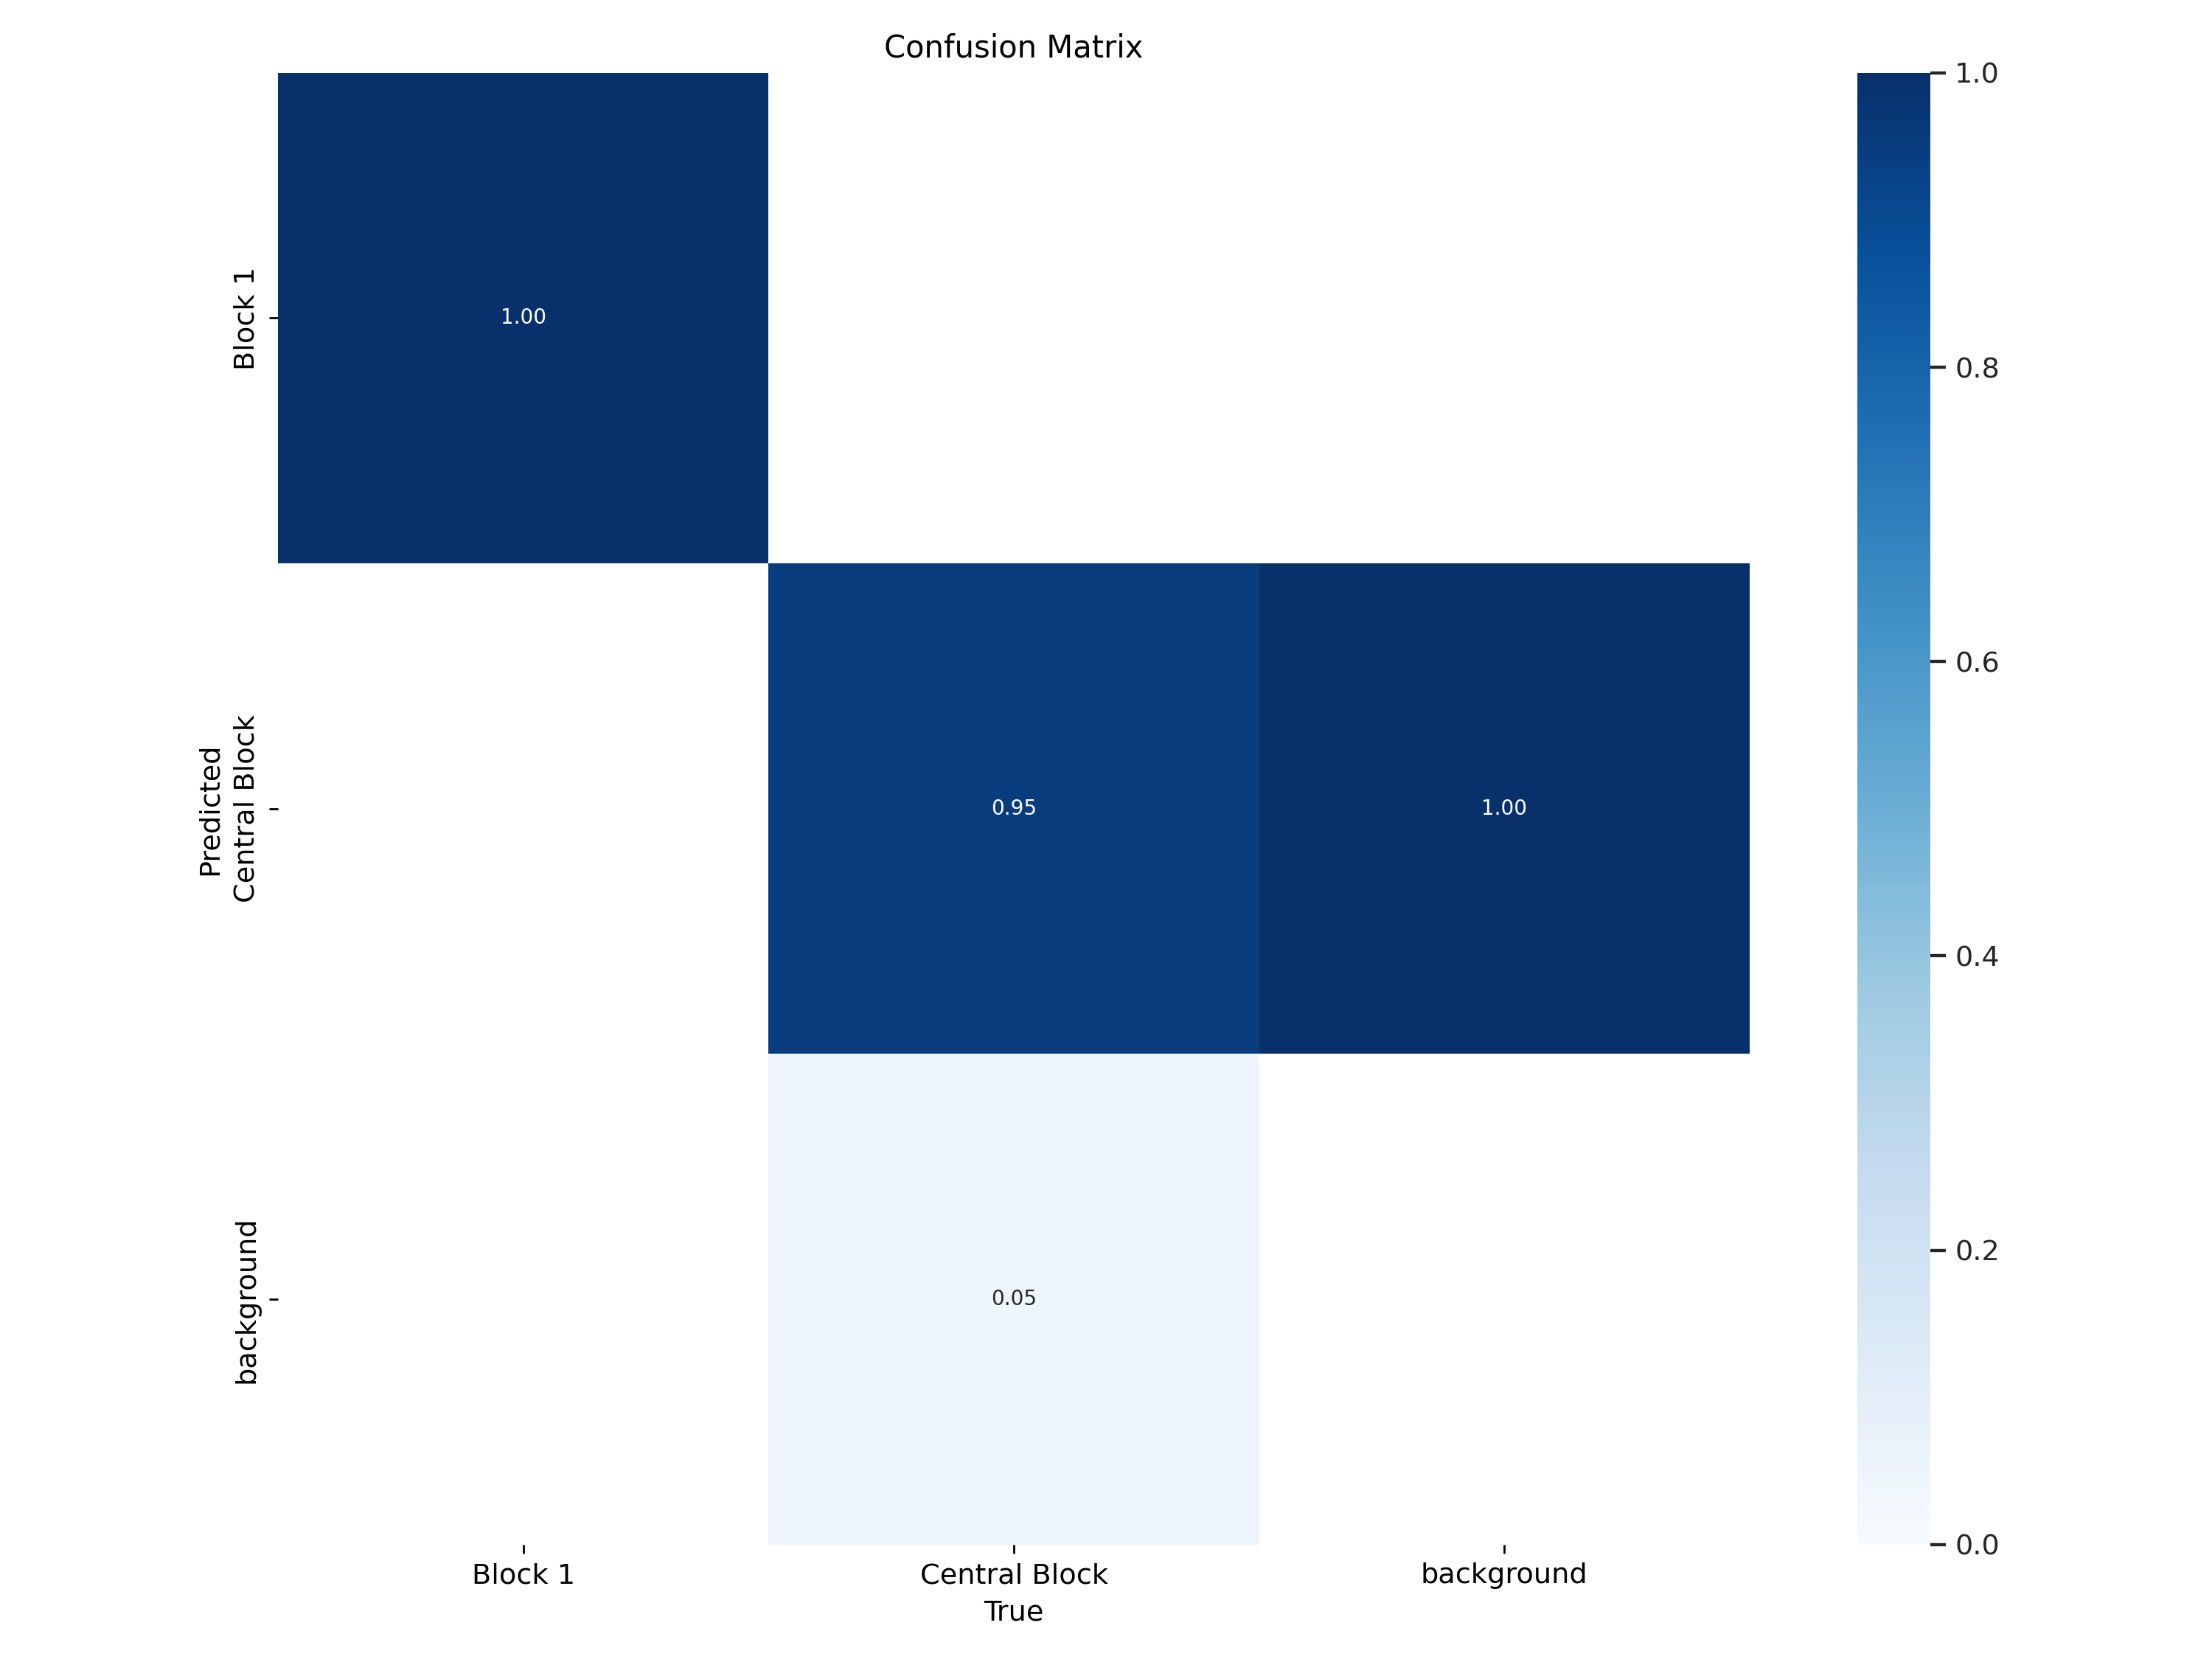

In [29]:
Image(filename="runs/train/exp3/confusion_matrix.png", width=600)

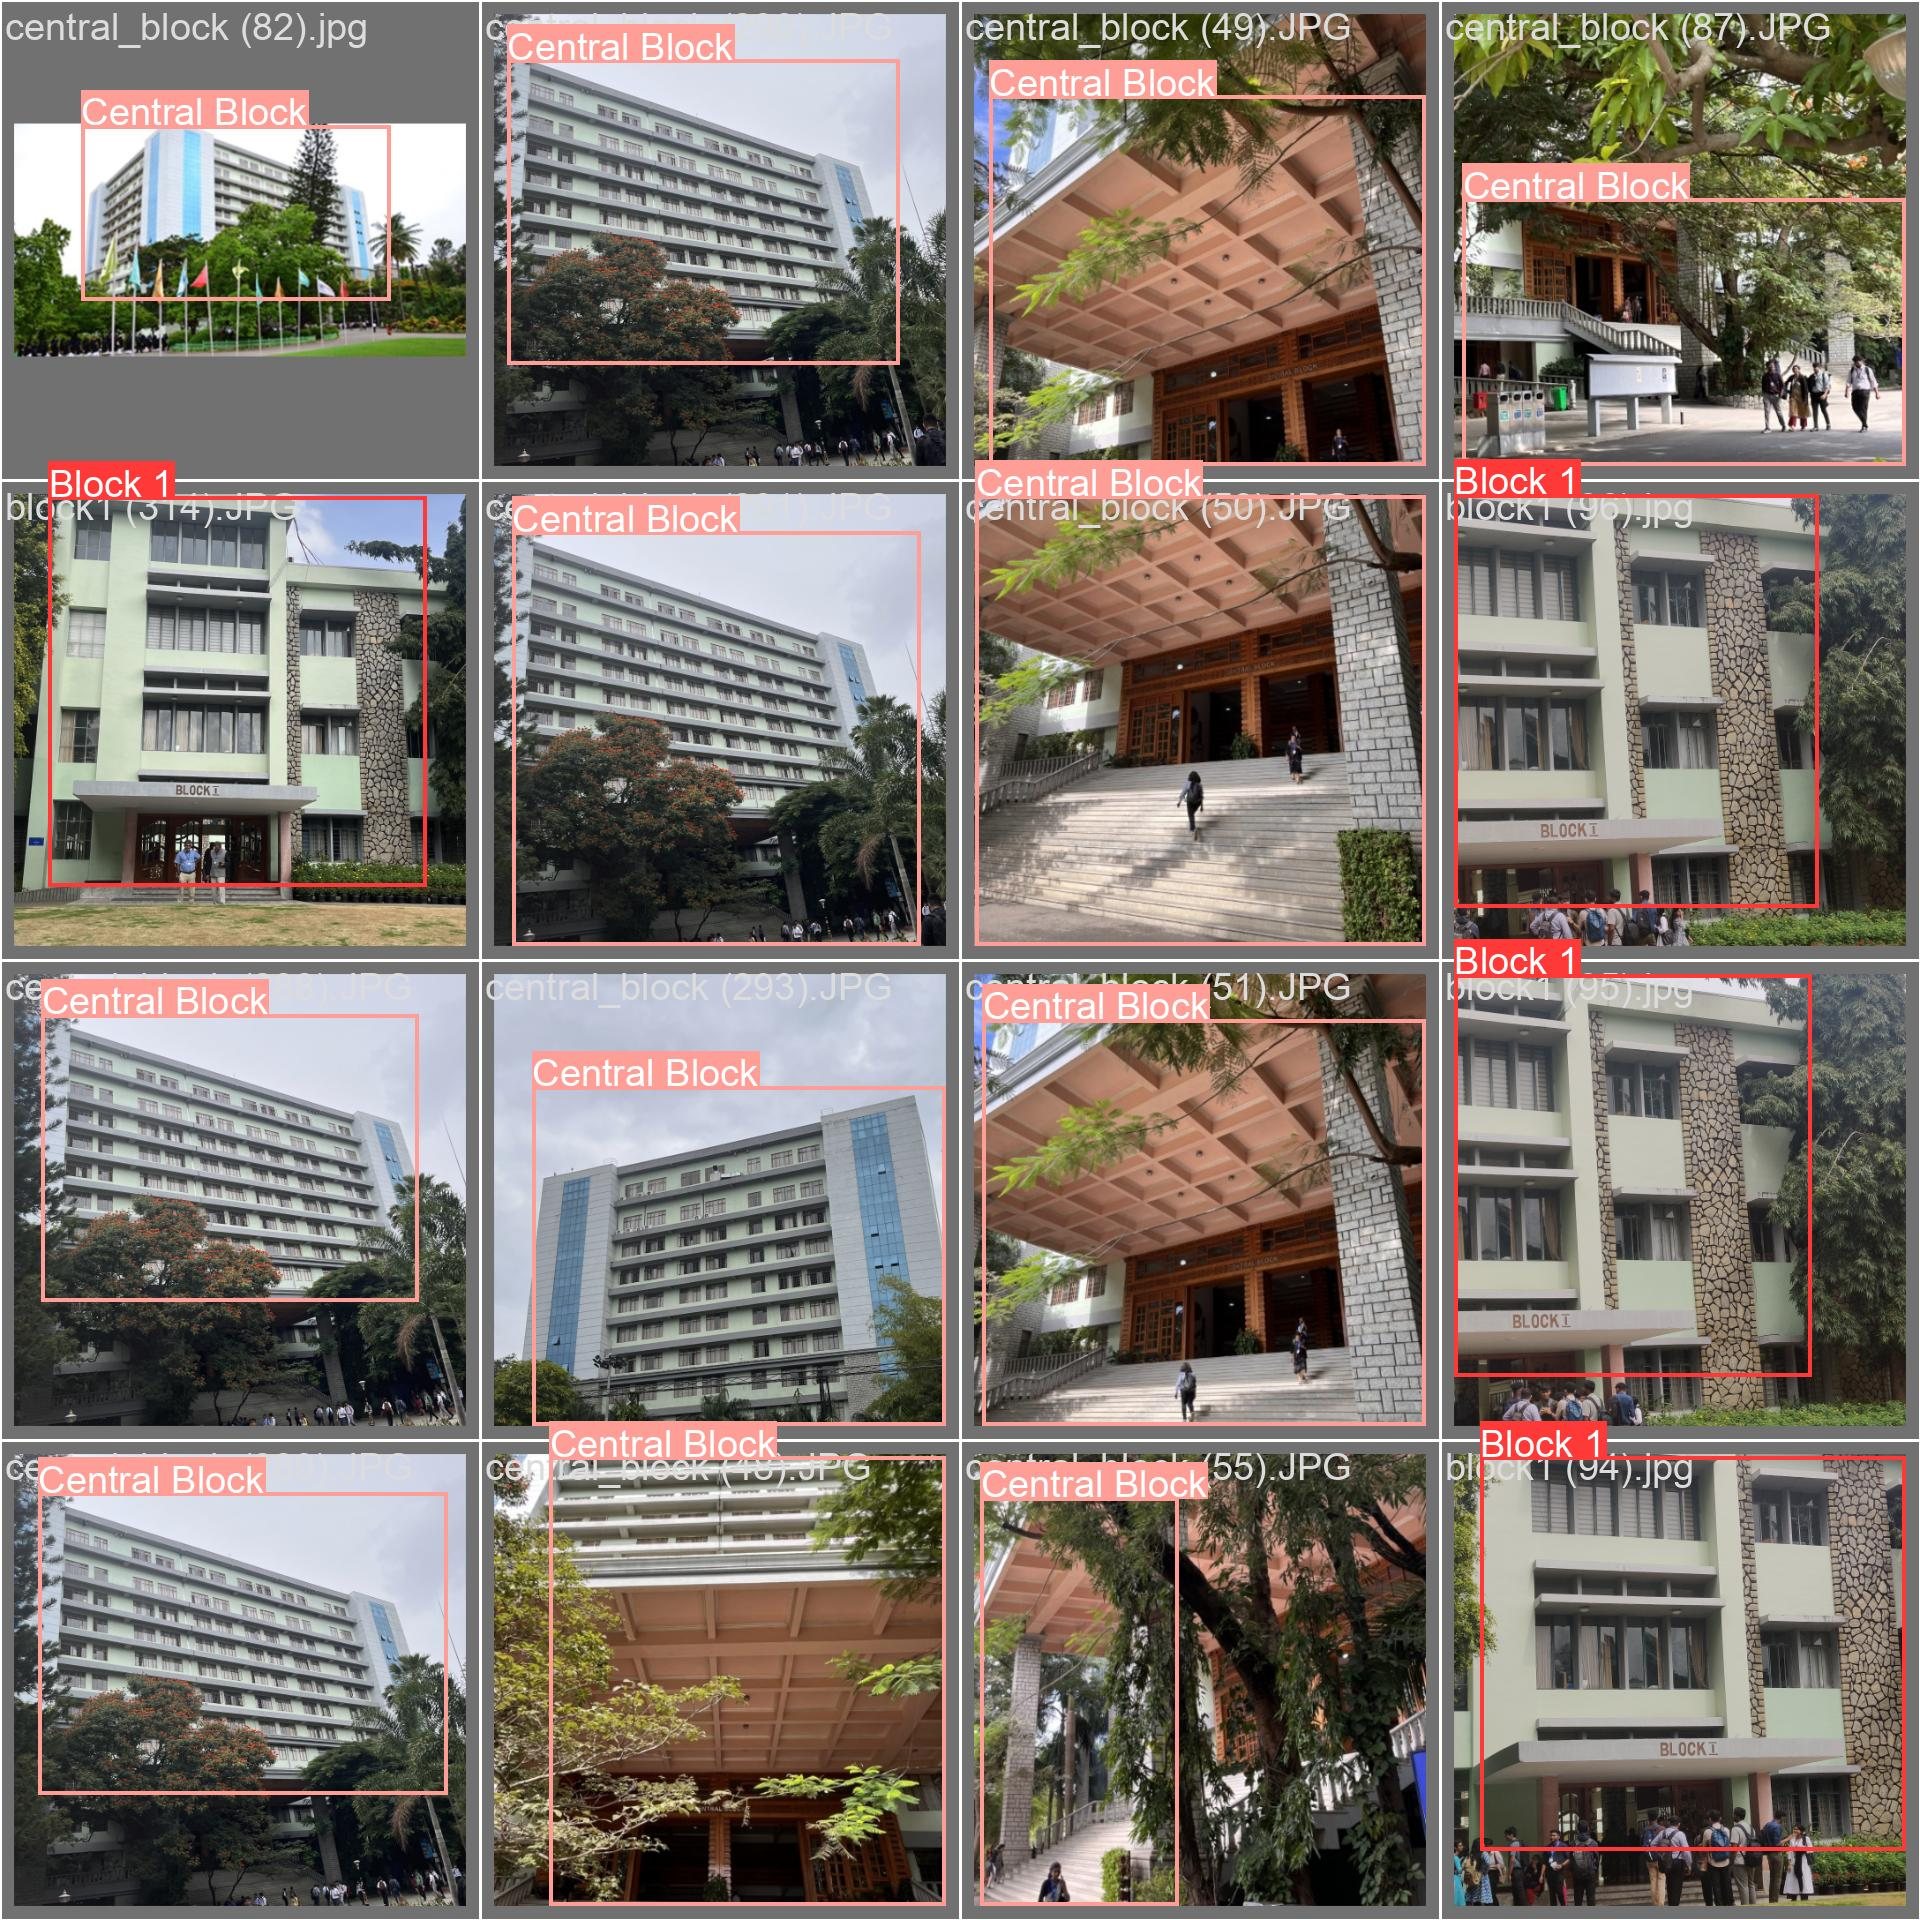

In [31]:
Image(filename="runs/train/exp3/val_batch0_labels.jpg", width=600)

In [32]:
#testing the model
!python detect.py --weights runs/train/exp3/weights/best.pt --img 500 --conf 0.25 --source /content/drive/MyDrive/YoloV5/data/test/images

detect: weights=['runs/train/exp3/weights/best.pt'], source=/content/drive/MyDrive/YoloV5/data/test/images, data=data/coco128.yaml, imgsz=[500, 500], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [500, 500] must be multiple of max stride 32, updating to [512, 512]
image 1/119 /content/drive/MyDrive/YoloV5/data/test/images/block1 (241).JPG: 512x384 1 Block 1, 55.7ms
image 2/119 /content/drive/MyDrive/YoloV5/data/test/images/block1 (242).JPG: 512x384 1 Block 1, 7.6ms
image 

In [33]:
!pwd

/content/drive/MyDrive/YoloV5/yolov5


In [39]:
# Convert weights to fp16 TFLite model

#!python export.py --weights runs/train/exp3/weights/best.pt --include tflite --img 500
!python export.py --weights runs/train/exp3/weights/best.pt --include tflite --int8 --img 500 --data data.yaml

export: data=data.yaml, weights=['runs/train/exp3/weights/best.pt'], imgsz=[500], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=True, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size 500 must be multiple of max stride 32, updating to 512
WARNING ⚠️ --img-size 500 must be multiple of max stride 32, updating to 512

PyTorch: starting from runs/train/exp3/weights/best.pt with output shape (1, 16128, 7) (13.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.13.0...

                 from  n    params  module                                  arguments                     
2023-10-04 15:10:16.162203: E tensorflow/compiler/xla/stre

In [35]:
!pwd

/content/drive/MyDrive/YoloV5/yolov5


In [41]:
#testing the tflite model

#!python detect.py --weights /content/drive/MyDrive/YoloV5/yolov5/runs/train/exp3/weights/best-int8.tflite --img 500 --conf 0.25 --source /content/drive/MyDrive/YoloV5/data/test/images
!python detect.py --weights /content/drive/MyDrive/YoloV5/yolov5/runs/train/exp3/weights/best-int8.tflite --img 500 --conf 0.25 --data data.yaml --source /content/drive/MyDrive/YoloV5/data/test/images

detect: weights=['/content/drive/MyDrive/YoloV5/yolov5/runs/train/exp3/weights/best-int8.tflite'], source=/content/drive/MyDrive/YoloV5/data/test/images, data=data.yaml, imgsz=[500, 500], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Loading /content/drive/MyDrive/YoloV5/yolov5/runs/train/exp3/weights/best-int8.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
WARNING ⚠️ --img-size [500, 500] must be multiple of max stride 32, updating to [512, 512]
image 1/119 /content/drive/MyDrive/YoloV5/data/test/images/block1 (241).JPG: 512x512 1 B